In [67]:
%matplotlib inline
import pandas as pd
import datetime
import matplotlib.pylab as plt
import seaborn as sns
from matplotlib.pylab import style
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import quandl
import requests 
import json 
import numpy as np

In [68]:
quandl.ApiConfig.api_key = 'iuyxJf4t-zGAW3ypiHCK'

In [69]:
data_GP = quandl.get("LBMA/GOLD")
GP = pd.DataFrame(data_GP)
GP

,USD (AM),USD (PM),GBP (AM),GBP (PM),EURO (AM),EURO (PM)
Date,,,,,,
1968-01-02,35.18,NaN,14.641,NaN,NaN,NaN
1968-01-03,35.16,NaN,14.617,NaN,NaN,NaN
1968-01-04,35.14,NaN,14.603,NaN,NaN,NaN
1968-01-05,35.14,NaN,14.597,NaN,NaN,NaN
1968-01-08,35.14,NaN,14.586,NaN,NaN,NaN
...,...,...,...,...,...,...
2023-04-18,1999.30,1999.40,1607.640,1609.52,1821.76,1825.05
2023-04-19,1976.10,1990.55,1590.760,1598.61,1806.95,1815.78
2023-04-20,1994.05,2007.15,1605.010,1611.54,1819.77,1828.11


In [70]:
GP_week = GP['GBP (PM)'].resample('W-MON').mean()
GP_train = GP_week['2015':'2022']

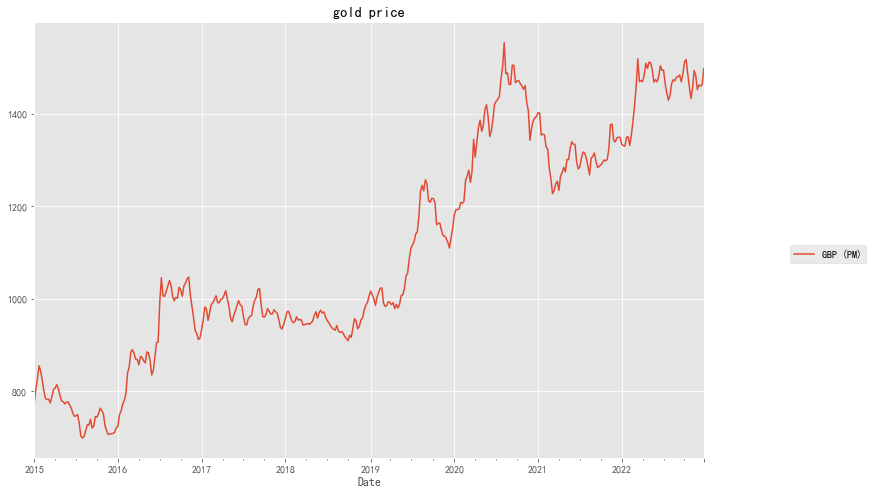

In [71]:
GP_train.plot(figsize=(12,8))
plt.legend(bbox_to_anchor=(1.25, 0.5))
plt.title("gold price")
sns.despine()

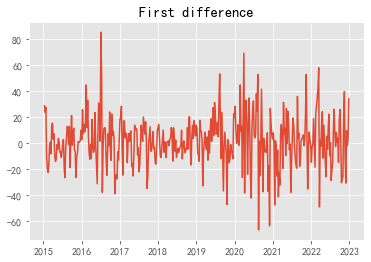

In [72]:
GP_diff = GP_train.diff()
GP_diff = GP_diff.dropna()

plt.figure()
plt.plot(GP_diff)
plt.title('First difference')
plt.show()

C:\Users\asus\AppData\Local\Temp\ipykernel_22236\2786290697.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  acf.show()


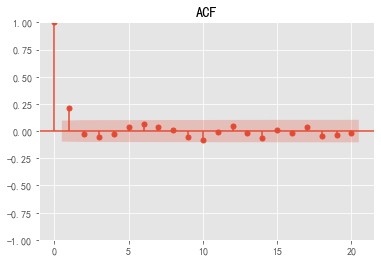

In [73]:
acf = plot_acf(GP_diff, lags=20)
plt.title("ACF")
acf.show()

D:\finprogramming\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(
C:\Users\asus\AppData\Local\Temp\ipykernel_22236\2641492201.py:3: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  pacf.show()


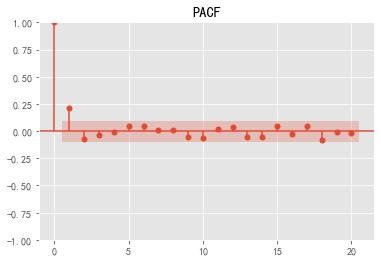

In [74]:
pacf = plot_pacf(GP_diff, lags=20)
plt.title("PACF")
pacf.show()

In [98]:
model = ARIMA(GP_train, order=(1, 1, 1),freq='W-MON')

In [99]:
result = model.fit()

In [100]:
pred = result.predict('20220425','20230425', dynamic=True, typ='levels')
print(pred)

2022-04-25    1514.220132
2022-05-02    1514.247464
2022-05-09    1514.247618
2022-05-16    1514.247619
2022-05-23    1514.247619
2022-05-30    1514.247619
2022-06-06    1514.247619
2022-06-13    1514.247619
2022-06-20    1514.247619
2022-06-27    1514.247619
2022-07-04    1514.247619
2022-07-11    1514.247619
2022-07-18    1514.247619
2022-07-25    1514.247619
2022-08-01    1514.247619
2022-08-08    1514.247619
2022-08-15    1514.247619
2022-08-22    1514.247619
2022-08-29    1514.247619
2022-09-05    1514.247619
2022-09-12    1514.247619
2022-09-19    1514.247619
2022-09-26    1514.247619
2022-10-03    1514.247619
2022-10-10    1514.247619
2022-10-17    1514.247619
2022-10-24    1514.247619
2022-10-31    1514.247619
2022-11-07    1514.247619
2022-11-14    1514.247619
2022-11-21    1514.247619
2022-11-28    1514.247619
2022-12-05    1514.247619
2022-12-12    1514.247619
2022-12-19    1514.247619
2022-12-26    1514.247619
2023-01-02    1514.247619
2023-01-09    1514.247619
2023-01-16  

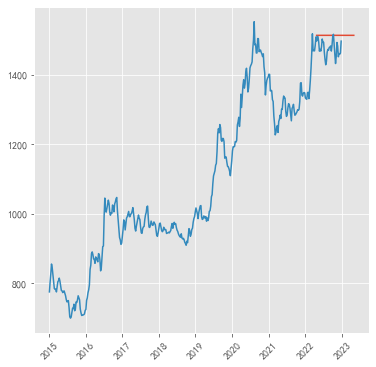

In [101]:
plt.figure(figsize=(6, 6))
plt.xticks(rotation=45)
plt.plot(pred)
plt.plot(GP_train)